<a href="https://colab.research.google.com/github/paulocdvieira/FIAP_PosTech_DA_F2_TechChallenge_G2/blob/main/Tech_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumo do Tech Challenge 2
**Objetivo** - Desenvolver um modelo de machine learning para prever a tendência diária (alta ou baixa) do índice IBOVESPA com pelo menos 75% de acurácia.

## Estrutura Geral
* **Duração** - 23 dias de desenvolvimento + 7 dias de revisão
* **Período de Desenvolvimento** - 29/09 a 21/10 (3 semanas)
* **Semana de Revisão** - 22/10 a 28/10 (1 semana)
* **Data de entrega** - 28/10
* **Entregável final** - Código de projeto (ou repositório GitHub), apresentação do storytelling e vídeo de apresentação gerencial.

**Base de dados:** https://drive.google.com/file/d/1r20DRqCqxW-eTyRqHOdiz3_S4dGiklbu/view?usp=sharing

**Período:** 01/01/2022 - 30/09/2025

# Cronograma por Semana

## Semana 1 (29/09 - 05/10) - Fundamentos e Exploração

### **Pedro:** Aquisição e Preparação dos Dados
**Objetivos** - Ter um dataset limpo, estruturado e com o índice temporal correto, pronto para análise e engenharia de atributos

#### **Tarefa 1:** Baixar os dados históriicos do IBOVESPA desde 2022

In [1]:
import pandas as pd
import numpy as np

In [2]:
file_id = "1r20DRqCqxW-eTyRqHOdiz3_S4dGiklbu"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_csv(url, sep=',')

#### **Tarefa 2:** Carregar os dados e realizar a inspeção inicial
*   .info()
*   .head()
*   .shape()

In [3]:
df.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,30.09.2025,146.237,146.337,147.578,145.774,"9,48B","-0,07%"
1,29.09.2025,146.337,145.447,147.558,145.447,"7,07B","0,61%"
2,26.09.2025,145.447,145.326,146.235,145.146,"6,34B","0,10%"
3,25.09.2025,145.306,146.492,146.519,145.187,"8,29B","-0,81%"
4,24.09.2025,146.492,146.426,146.585,146.067,"7,29B","0,05%"
5,23.09.2025,146.425,145.112,147.178,145.107,"8,14B","0,91%"
6,22.09.2025,145.109,145.864,145.864,144.117,"9,43B","-0,52%"
7,19.09.2025,145.865,145.499,146.399,145.496,"10,28B","0,25%"
8,18.09.2025,145.499,145.594,145.726,144.993,"8,37B","-0,06%"
9,17.09.2025,145.594,144.059,146.331,143.910,"9,60B","1,06%"


In [4]:
df.shape

(937, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      937 non-null    object 
 1   Último    937 non-null    float64
 2   Abertura  937 non-null    float64
 3   Máxima    937 non-null    float64
 4   Mínima    937 non-null    float64
 5   Vol.      937 non-null    object 
 6   Var%      937 non-null    object 
dtypes: float64(4), object(3)
memory usage: 51.4+ KB


In [6]:
df.head(3)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,30.09.2025,146.237,146.337,147.578,145.774,"9,48B","-0,07%"
1,29.09.2025,146.337,145.447,147.558,145.447,"7,07B","0,61%"
2,26.09.2025,145.447,145.326,146.235,145.146,"6,34B","0,10%"


In [7]:
df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')
df['Var%'] = df['Var%'].str.replace('%','').str.replace(',','.').astype(float)

In [8]:
def converter_volume(valor):
    valor = valor.replace(',', '.')

    if 'B' in valor:
        return float(valor.replace('B','')) * 1e9
    elif 'M' in valor:
        return float(valor.replace('M','')) * 1e6
    else:
        return float(valor)

df['Vol.'] = df['Vol.'].apply(converter_volume)

In [9]:
df.head(3)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2025-09-30,146.237,146.337,147.578,145.774,9.480000e+09,-0.07
1,2025-09-29,146.337,145.447,147.558,145.447,7.070000e+09,0.61
2,2025-09-26,145.447,145.326,146.235,145.146,6.340000e+09,0.10


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      937 non-null    datetime64[ns]
 1   Último    937 non-null    float64       
 2   Abertura  937 non-null    float64       
 3   Máxima    937 non-null    float64       
 4   Mínima    937 non-null    float64       
 5   Vol.      937 non-null    float64       
 6   Var%      937 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 51.4 KB


In [11]:
df = df.rename(columns={
    'Data': 'data',
    'Último': 'ultimo',
    'Abertura': 'abertura',
    'Máxima': 'max',
    'Mínima': 'min',
    'Vol.': 'volume',
    'Var%': 'var'
})

In [12]:
df.head(3)

,data,ultimo,abertura,max,min,volume,var
0,2025-09-30,146.237,146.337,147.578,145.774,9.480000e+09,-0.07
1,2025-09-29,146.337,145.447,147.558,145.447,7.070000e+09,0.61
2,2025-09-26,145.447,145.326,146.235,145.146,6.340000e+09,0.10


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data      937 non-null    datetime64[ns]
 1   ultimo    937 non-null    float64       
 2   abertura  937 non-null    float64       
 3   max       937 non-null    float64       
 4   min       937 non-null    float64       
 5   volume    937 non-null    float64       
 6   var       937 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 51.4 KB


#### **Tarefa 3:** Realizar a limpeza, tratando valores ausentes (se houver) e duplicados

In [14]:
df.isnull().sum()

,0
data,0
ultimo,0
abertura,0
max,0
min,0
volume,0
var,0


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.data.min()

Timestamp('2022-01-03 00:00:00')

In [17]:
df.data.max()

Timestamp('2025-09-30 00:00:00')

#### **Tarefa 4:** Converter a coluna de data para o formato "datetime" e defini-la como índice

In [18]:
df = df.set_index('data')

In [19]:
df.head(2)

,ultimo,abertura,max,min,volume,var
data,,,,,,
2025-09-30,146.237,146.337,147.578,145.774,9.480000e+09,-0.07
2025-09-29,146.337,145.447,147.558,145.447,7.070000e+09,0.61


### **Leticia:** Análise Exploratória de Dados e Definição da Variável Alvo
**Objetivos** - Compreender as características dos dados, gerar hipóteses e definir claramente o que o modelo deve prever

In [20]:
# Ordenação do índice
df = df.sort_index(ascending=True)

In [21]:
df.head()

,ultimo,abertura,max,min,volume,var
data,,,,,,
2022-01-03,103.922,104.823,106.125,103.413,11130000.0,-0.86
2022-01-04,103.514,103.922,104.276,103.096,11490000.0,-0.39
2022-01-05,101.006,103.514,103.514,100.850,12880000.0,-2.42
2022-01-06,101.561,101.006,102.235,101.000,11750000.0,0.55
2022-01-07,102.719,101.561,102.719,101.104,11730000.0,1.14


#### **Tarefa 1:** Realizar a análise estatística descritiva (*.describe()*) das variáveis numéricas

In [22]:
# Análise estatística
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ultimo,937.0,1.205500e+02,1.136000e+01,96.12,111.44,120.26,129.13,1.464900e+02
abertura,937.0,1.205100e+02,1.135000e+01,96.12,111.36,120.26,129.12,1.464900e+02
max,937.0,1.214100e+02,1.127000e+01,96.97,112.50,121.16,129.79,1.475800e+02
min,937.0,1.196700e+02,1.146000e+01,95.27,110.32,119.71,128.15,1.460700e+02
volume,937.0,1.887088e+09,3.952608e+09,4330000.00,9920000.00,12180000.00,16390000.00,2.487000e+10
var,937.0,4.000000e-02,1.070000e+00,-3.35,-0.58,0.03,0.70,5.540000e+00


**Insights da análise estatística**
* Preços (último, abertura, máxima, mínima)
    * A média está em torno de 120.000, o que sugere estabilidade
    * A volatilidade, com um desvio padrão de +- 11.300 é relativamente alta em relação à média, o que indica variações relevantes
    * Diferença de cerca de 50.000 entre mínimo e máximo, o que reflete choques externos significativos

* Volume
  * Desvio padrão muito elevado
  * Assimetria forte (min = 4,3 milhões, max = 24,8 bilhões)

* Variação (var)
  * Desvio padrão de 1,07% indica pouca variação durante o dia
  * Min = -3,35% e max = +5,54% indica que existem dias de forte volatilidade, mas são raros



#### **Tarefa 2:** Visualizar a série temporal do preço de fechamento (gráfico de linhas) para identificar tendências e padrões

In [23]:
import matplotlib.pyplot as plt

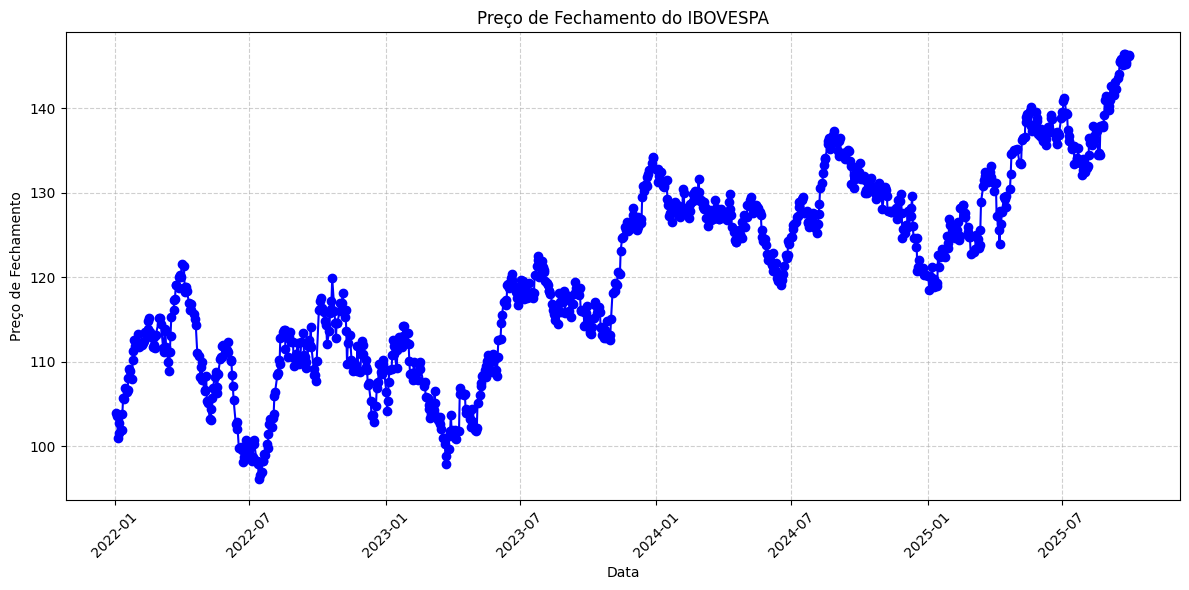

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['ultimo'], marker='o', linestyle='-', color='b')
plt.title('Preço de Fechamento do IBOVESPA')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Tendência: Tendência positiva
* Padrões e Sazonalidade: O gráfico segue o mesmo "padrão" de flutuação, se movendo para cima (tendência positiva)
* Há algumas anomalias (ruídos/outliers)

#### **Tarefa 3:** Plotar histogramas e boxplots para entender a distribuição dos dados e identificar outliers

In [25]:
import seaborn as sns

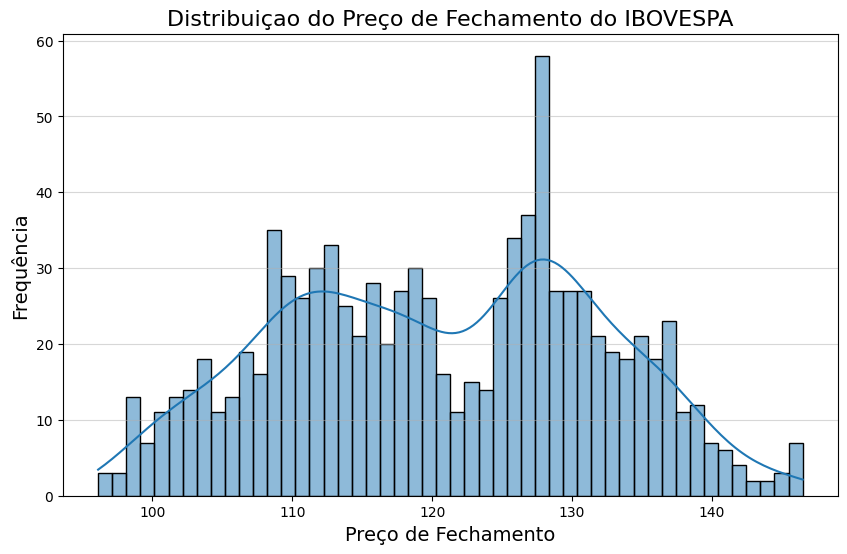

In [26]:
# Histograma de valor de fechamento
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=df['ultimo'], kde=True, bins=50) # kde = sobrepõe a Estimativa de Densidade de Kernel, bins = controla a granularidade do histograma
plt.title(f"Distribuiçao do Preço de Fechamento do IBOVESPA", fontsize=16)
plt.xlabel("Preço de Fechamento", fontsize=14)
plt.ylabel("Frequência", fontsize=14)
plt.grid(axis='y', alpha=0.5)
plt.show()

* Distribuição assimétrica, mostrando dois picos próximos a 110 e 130
* Cauda mais longa para preços acima de 135 mil, indicando que, apesar de menos frequente, houve dias de forte valorização, o que puxa a média um pouco acima da mediana

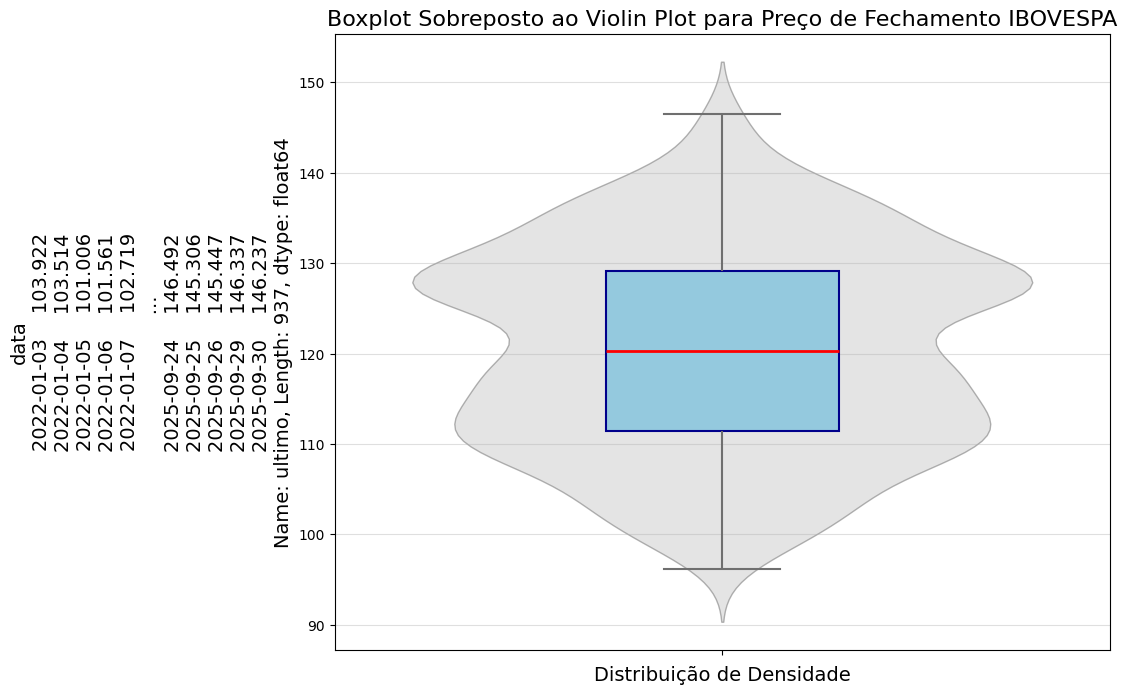

In [27]:
# Boxplot e Violin plot
plt.figure(figsize=(10,8))

ax = sns.violinplot(
    data=df,
    y=df['ultimo'],
    inner=None,
    color='lightgray',
    alpha=0.6,
    linewidth=1
)

sns.boxplot(
    data=df,
    y=df['ultimo'],
    width=0.3,
    color='skyblue',
    boxprops={'edgecolor': 'darkblue', 'linewidth': 1.5},
    medianprops={'color': 'red', 'linewidth': 2}, # Mediana em destaque
    whiskerprops={'linewidth': 1.5},
    capprops={'linewidth': 1.5},
    ax=ax
)

plt.title(f"Boxplot Sobreposto ao Violin Plot para Preço de Fechamento IBOVESPA", fontsize=16)
plt.ylabel(df['ultimo'], fontsize=14)
plt.xlabel('Distribuição de Densidade', fontsize=14)
plt.grid(axis='y', alpha=0.4)
plt.show()

#### **Tarefa 4:** Criar a variável alvo (target), uma coluna que indica se o fechamento do dia seguinte for maior (1), menor (-1) ou igual (0) ao do dia atual

In [28]:
import numpy as np

In [29]:
# Cálculo da diferença entre o valor atual e o valor anterior
diferenca = df['ultimo'] - df['ultimo'].shift(1)

# Criação da variável target
df['tendencia_fechamento'] = np.sign(diferenca)

In [30]:
df[['tendencia_fechamento', 'ultimo']].head()

,tendencia_fechamento,ultimo
data,,
2022-01-03,NaN,103.922
2022-01-04,-1.0,103.514
2022-01-05,-1.0,101.006
2022-01-06,1.0,101.561
2022-01-07,1.0,102.719


In [31]:
# Removendo a primeira linha (não apresenta nenhuma tendência, valor inválido)
df.dropna(subset=['tendencia_fechamento'], inplace=True)

In [32]:
df[['tendencia_fechamento', 'ultimo']].head()

,tendencia_fechamento,ultimo
data,,
2022-01-04,-1.0,103.514
2022-01-05,-1.0,101.006
2022-01-06,1.0,101.561
2022-01-07,1.0,102.719
2022-01-10,-1.0,101.945


### **Paulo:** Estruturação do Projeto e Pipeline Inicial
**Objetivos** = Montar a arquitetura do projeto e criar um pipeline de pré-processamento que evite vazamento de dados (data leakage)

#### **Tarefa 1:** Criar a estrutura do repositório no GitHub

[Repositório Github](https://github.com/paulocdvieira/FIAP_PosTech_DA_F2_TechChallenge_G2/blob/main/Tech_Challenge_2.ipynb)

#### **Tarefa 2:** Revisar a documentação sobre Pipeline do Scikit-Learn e Validação Cruzada

[Scikit-learn: Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

[Scikit-learn: Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html)

#### **Tarefa 3:** Dividir os dados em conjuntos de treino e teste (últimos 30 dias para teste)

In [41]:
# Define data limite para os últimos 30 dias
data_limite = df.index.max() - pd.Timedelta(days=30)

#Divide dados em treino e teste
df_treino = df[df.index <= data_limite]
df_teste = df[df.index > data_limite]

# Imprime tamanho dos dfs
print(f'treino: {df_treino.shape[0]} linhas')
print(f'teste: {df_teste.shape[0]} linhas')

treino: 914 linhas
teste: 22 linhas


#### **Tarefa 4:** Desenvolver um script inicial para o pipeline de pré-processamento, incluindo o escalonamento de dados (StandardScaler ou MinMaxScaler)

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [44]:
# Selecionar colunas numéricas para escalonamento
colunas_numericas = df.columns.tolist()
colunas_numericas

['ultimo', 'abertura', 'max', 'min', 'volume', 'var', 'tendencia_fechamento']

In [45]:
# Escolher o tipo de escalonador

scaler = MinMaxScaler()  # Alternativa: use StandardScaler() se preferir normalização padrão

In [46]:
# Ajustar o scaler com os dados de treino e transformar ambos
X_treino = scaler.fit_transform(df_treino[colunas_numericas])
X_teste = scaler.transform(df_teste[colunas_numericas])

# Converter de volta para DataFrame com os mesmos índices e colunas
df_treino_scaled = pd.DataFrame(X_treino, index=df_treino.index, columns=colunas_numericas)
df_teste_scaled = pd.DataFrame(X_teste, index=df_teste.index, columns=colunas_numericas)

# Visualizar resultado
print("Treino escalonado:")
print(df_treino_scaled.head())

print("\nTeste escalonado:")
print(df_teste_scaled.head())

Treino escalonado:
              ultimo  abertura       max       min    volume       var  \
data                                                                     
2022-01-04  0.163197  0.172839  0.160875  0.171189  0.000288  0.332958   
2022-01-05  0.107834  0.163802  0.144094  0.122078  0.000344  0.104612   
2022-01-06  0.120086  0.108249  0.115927  0.125358  0.000298  0.438695   
2022-01-07  0.145648  0.120542  0.126586  0.127632  0.000298  0.505062   
2022-01-10  0.128562  0.146192  0.126586  0.126189  0.000238  0.292463   

            tendencia_fechamento  
data                              
2022-01-04                   0.0  
2022-01-05                   0.0  
2022-01-06                   1.0  
2022-01-07                   1.0  
2022-01-10                   0.0  

Teste escalonado:
              ultimo  abertura       max       min    volume       var  \
data                                                                     
2025-09-01  0.996932  1.003500  0.990552  0.997332

## Semana 2 (06/10 - 12/10): Engenharia de Atributos e Modelagem Inicial

### **Pedro:** Engenharia de Atributos
**Objetivos** - Aumentar o poder preditivo do dataset com atributos relevantes

#### **Tarefa 1:** Criar features de médias móveis (curta, média e longa) para capturar tendências

#### **Tarefa 2:** Desenvolver *features lagged* (valores de fechamento e volume de dias anteriores) para tratar a natureza sequencial dos dados

#### **Tarefa 3:** Calcular indicadores técnicos simples (ex.: variação percentual diária)

#### **Tarefa 4:** Analisar a correlação entre as novas features e a variável alvo

### **Leticia:** Modelagem e Treinamento (Modelo baseado em Árvores)
**Objetivos** - Construir e validar os primeiros modelos de classificação

#### **Tarefa 1:** Integrar as novas features ao pipeline de pré-processamento

#### **Tarefa 2:** Treinar e validar um modelo de Árvore de Decisão como baseline

#### **Tarefa 3:** Treinar a avaliar um modelo de Random Forest

#### **Tarefa 4:** Aplicar Validação Cruzada (K-Fold) para garantir a robustez dos resultados

### **Paulo:** Modelagem e Treinamento (Outros Classificadores)
**Objetivos** - Testar diferentes abordagens de classificação para comparar o desempenho

#### **Tarefa 1:** Treinar e avaliar um modelo KNN (K-Nearest Neighbors)

#### **Tarefa 2:** Treinar e avaliar um modelo SVM (Support Vector Machine)

#### **Tarefa 3:** Começar a documentar os resultados e métricas iniciais (Acurácia, Matriz de Confusão) de todos os modelos testados

## Semana 3 (13/10 - 21/10): Otimização, Avaliação Final e Documentação

### **Pedro:** Otimização de Hiperparâmetros e Análise de Métricas
**Objetivos** - Refinar o melhor modelo e realizar uma análise aprofundada de suas métricas de desempenho

#### **Tarefa 1:** Utilizar "GridSearchCV" para encontrar a melhor combinação de hiperparâmetros para o modelo de melhor desempenho

#### **Tarefa 2:** Com o modelo otimizado, gerar o "Classification Report" para analisar Precisão, Recall e F1-Score

#### **Tarefa 3:** Plotar a Curva ROC e calcular a AUC para avaliar o poder de discriminação do modelo final

### **Paulo:** Elaboração do Storytelling e Justificativa Técnica
**Objetivos** - Construir a narrativa técnica do projeto e preparar o conteúdo para os entregáveis escritos

#### **Tarefa 1:** Estruturar e redigir a apresentação do storytelling, cobrindo desde a aquisição dos dados até a análise dos resultados

#### **Tarefa 2:** Escrever a justificativa técnica, explicando a escolha do modelo e como a natureza sequencial dos dados foi tratada

#### **Tarefa 3:** Detalhar os trade-offs entre acuracidade e overfitting

### **Leticia:** Consolidação do Código e Preparação dos Entregáveis
**Objetivos** - Finalziar todos os componentes técnicos e de apresentação para a entrega

#### **Tarefa 1:** Reunir, organizar e comentar o código final, garantindo sua reprodutibilidade

#### **Tarefa 2:** Finalizar o design e a coesão da apresentação em PPT/PDF

#### **Tarefa 3:** Roteirizar o vídeo de apresentação de 5 minutos, definindo a fala de cada membro

#### **Tarefa 4:** Deixar todos os artefatos prontos para a revisão final na semana seguinte

## Semana de Revisão (22/10 a 28/10)

* **Testes Finais:** Executar o pipeline completo uma última vez e garantir que não há erros
* **Revisão do Código:** Fazer uma revisão cruzada do código em busca de melhorias de clareza e comentários
* **Gravação do Relatório e Apresentação:** Revisar o storytelling para garantir que a comunicação está clara, objetiva e alinhada aos requisitos do projeto
* **Gravação e Edição do Vídeo:** Gravar a apresentação, garantindo que todos os membros participem e que o vídeo final tenha no máximo 5 minutos
* **Empacotamento Final:** Prepara a pasta .zip ou organizar o repositório GitHub para a submissão final no dia 28/10

### **Execução do Projeto**

## Preparação dos Dados